In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import operator

from util.api import get_pkgs_indirect_dependency, calculate_bottom, diagram_box, get_lts_list

%matplotlib inline
plt.style.use('classic')

In [2]:
lts_list = get_lts_list()
df_list = []
df_by_category_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/lts-{lts}/lts-{lts}.df')
    df_list.append(df)

In [3]:
ind_dependence_package = get_pkgs_indirect_dependency(df_list)

0-7 processed
2-22 processed
3-22 processed
6-35 processed
7-24 processed
9-21 processed
11-22 processed
12-14 processed
12-26 processed
13-11 processed
13-19 processed
14-27 processed
15-3 processed
16-11 processed
16-31 processed
17-2 processed
18-6 processed
18-8 processed
18-28 processed
19-11 processed


In [4]:
for lts in range (len(df_list)):
    print(lts_list[lts],'package: ',df_list[lts]['package'][df_list[lts]['len_ind_deps']==min(df_list[lts]['len_ind_deps'])][0],'total deps: ',min(df_list[lts]['len_ind_deps']))


0-7 package:  QuickCheck total deps:  0
2-22 package:  QuickCheck total deps:  0
3-22 package:  NineP total deps:  0
6-35 package:  HaskellNet-SSL total deps:  0
7-24 package:  Clipboard total deps:  0
9-21 package:  Clipboard total deps:  0
11-22 package:  Clipboard total deps:  0
12-14 package:  Clipboard total deps:  0
12-26 package:  Clipboard total deps:  0
13-11 package:  Clipboard total deps:  0
13-19 package:  Clipboard total deps:  0
14-27 package:  Clipboard total deps:  0
15-3 package:  Clipboard total deps:  0
16-11 package:  Clipboard total deps:  0
16-31 package:  Clipboard total deps:  0
17-2 package:  Clipboard total deps:  0
18-6 package:  Clipboard total deps:  0
18-8 package:  Clipboard total deps:  0
18-28 package:  Clipboard total deps:  0
19-11 package:  Clipboard total deps:  0


In [5]:
for lts in range (len(df_list)):
    len_deps = []
    for i,x in enumerate (list(df_list[lts]['deps'])):
        len_deps.append(len(x))
    df_list[lts]['len_deps'] = len_deps
    print(lts_list[lts],'package: ',df_list[lts]['package'][df_list[lts]['len_deps']==max(df_list[lts]['len_deps'])][0],'total deps: ',max(df_list[lts]['len_deps']))
    print(lts_list[lts],'package: ',df_list[lts]['package'][df_list[lts]['len_ind_deps']==max(df_list[lts]['len_ind_deps'])][0],'total deps: ',max(df_list[lts]['len_ind_deps']))
    

0-7 package:  fpco-api total deps:  50
0-7 package:  classy-prelude-yesod total deps:  160
2-22 package:  keter total deps:  47
2-22 package:  classy-prelude-yesod total deps:  167
3-22 package:  stack total deps:  89
3-22 package:  classy-prelude-yesod total deps:  170
6-35 package:  stack total deps:  89
6-35 package:  yesod-job-queue total deps:  175
7-24 package:  stack total deps:  89
7-24 package:  yesod-job-queue total deps:  184
9-21 package:  stack total deps:  95
9-21 package:  yesod-recaptcha2 total deps:  195
11-22 package:  language-puppet total deps:  65
11-22 package:  classy-prelude-yesod total deps:  183
12-14 package:  stack total deps:  81
12-14 package:  yesod-recaptcha2 total deps:  192
12-26 package:  stack total deps:  81
12-26 package:  yesod-recaptcha2 total deps:  192
13-11 package:  stack total deps:  81
13-11 package:  stack2nix total deps:  189
13-19 package:  stack total deps:  81
13-19 package:  stack2nix total deps:  189
14-27 package:  stack total deps:

# Research Questions (RQs)

- **RQ 1.** What packages are the most used? Which of them are outside from the Stackage selection?
- **RQ 2.** How many dependencies of packages are outside from the Stackage selection (in)directly?
- **RQ 3.** How frequently are the packages updated? 

Regarding monads, we analyze the evolution of dependencies of monad modules available in the mtl package:

- **RQ 4.** How has the use of monads evolved?
- **RQ 5.** Are there packages that stopped using monads?

## **RQ 2.** How many packages are outside of Stackage due to his (in)direct dependencies?

Procesamos todos los snapshots que consideramos en nuestra investigacion. Realizamos una busqueda en profundidad a las dependencias de cada paquete de los LTS, buscando alguna dependencia (in)directa que no se encontrara en la seleccion. Si este era el caso, se agregaba a un conjunto de paquetes que luego contabilizamos por cada LTS. Finalmente, calculamos el porcentage que estos paquetes representaban en cada snapshot.

* Cambiar leyenda por: (in)directly

- Mas del 12% de los paquetes quedan fuera de la seleccion indireamente al usar paquetes que non se encuentran en stackage
- Inclusive este valor aumento con el tiempo llegando a alcanzar el 17% en (<año>) y manteniendose en un 15% durante todas las versiones.
- algunos de los paquetes que tienen mas impacto en este problea son: ['quickcheck', 'microlens', 'hunit', 'cabal']
-  en el caso de cabal, este paquete fue deprecado por uno nuevo llamado Cabal, sin embargo, existen paquetes que todavia lo utilizan


In [6]:
count_dependency = {}
aver_direct_dependency = []
aver_indirect_dependency = []
data = []

for idx, df in enumerate(df_list):
    totaldir = 0
    totalind = 0
    for idx, row in df.iterrows():
        totaldir += row['len_deps']
        totalind += row['len_ind_deps']
    aver_direct_dependency.append(round(totaldir / len(df), 1))
    aver_indirect_dependency.append(round(totalind / len(df), 1))
    
count_values = list(count_dependency)
aver_values = list(aver_direct_dependency)
aver_ind_values = list(aver_indirect_dependency)

data.append(aver_values)
data.append(aver_ind_values)

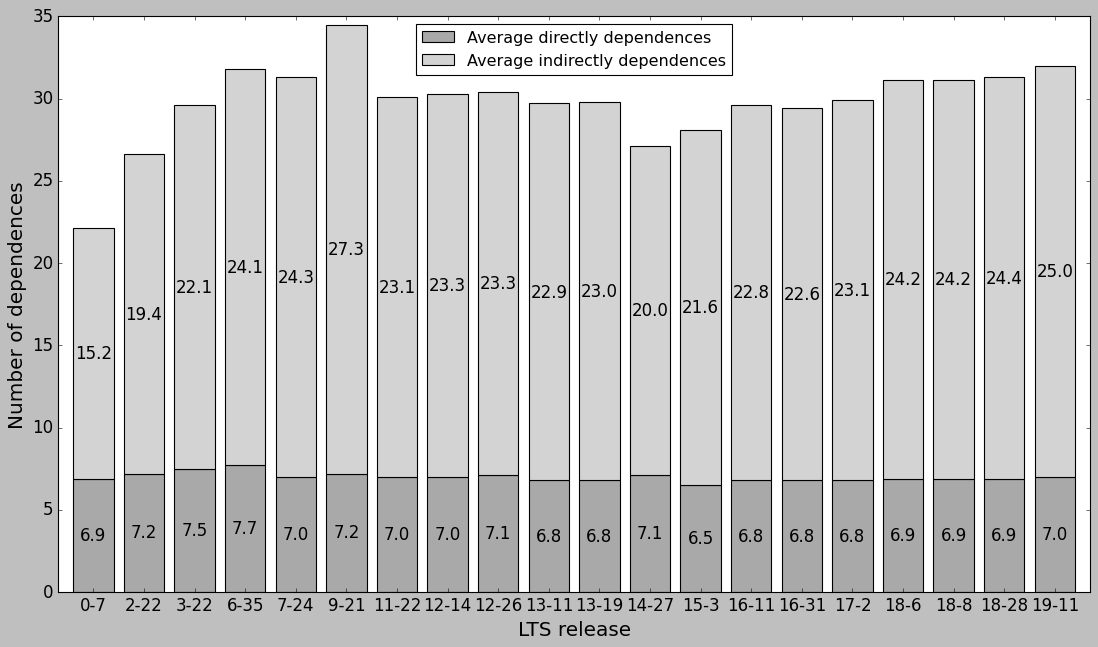

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.015) 
plt.subplots_adjust(bottom=0.1, right=1.2, top=1)

colors = ['darkgrey','lightgrey']
dependences_type = ['Average directly dependences','Average indirectly dependences']
for idx, dependences in enumerate(dependences_type):
    bar = ax.bar(x=lts_list, height=data[idx], bottom=calculate_bottom(data, idx), width=0.8, color=colors[idx], align='center', label=dependences)
    ax.bar_label(bar, labels=list(data[idx]), label_type='center', color='black', fontsize=15)

ax.legend(loc='best')
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('Number of dependences',fontsize=18)
ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35])
ax.set_yticklabels(['0', '5', '10', '15', '20', '25', '30', '35'],fontsize=15)
plt.show()

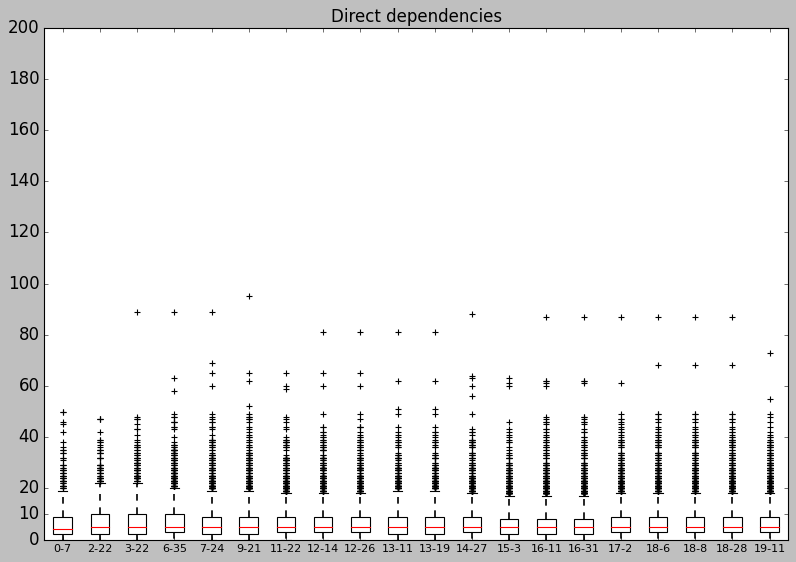

In [8]:
aux_list =  []
for idx,df in enumerate (df_list):
    aux_list.append(df_list[idx]['len_deps'])
fig,ax = plt.subplots(figsize =(12, 8)) 
bp = plt.boxplot(aux_list, patch_artist=True)
for box in bp['boxes']:
    box.set(color='black')
    box.set(facecolor = 'white')
for whisker in bp['whiskers']: 
    whisker.set(color ='black', 
                linewidth = 1.5)    
plt.xticks([idx+1 for idx in range(len(lts_list))],lts_list,size = 'small', color = 'k')
ax.set_yticks([0,10,20,40, 60, 80, 100,120,140,160,180,200])
ax.set_yticklabels(['0','10','20','40', '60', '80', '100','120','140','160','180','200'],fontsize=15)
plt.title('Direct dependencies', fontsize=15)  
plt.savefig("../../graphs/rq2_1.pdf", format='pdf', bbox_inches='tight')
plt.show()

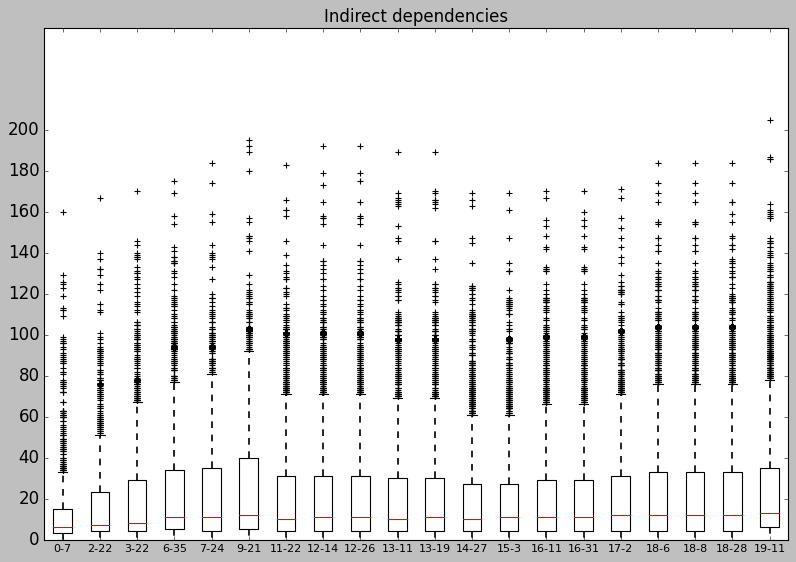

In [9]:
aux_list =  []
for idx,df in enumerate (df_list):
    aux_list.append(df_list[idx]['len_ind_deps'])
fig,ax = plt.subplots(figsize =(12, 8)) 
bp = plt.boxplot(aux_list, patch_artist=True)
for box in bp['boxes']:
    box.set(color='black')
    box.set(facecolor = 'white')
for whisker in bp['whiskers']: 
    whisker.set(color ='black', 
                linewidth = 1.5)  
plt.xticks([idx+1 for idx in range(len(lts_list))],lts_list,size = 'small', color = 'k')
ax.set_yticks([0,20,40, 60, 80, 100,120,140,160,180,200])
ax.set_yticklabels(['0','20','40', '60', '80', '100','120','140','160','180','200'],fontsize=15)
plt.title('Indirect dependencies', fontsize=15)  
plt.savefig("../../graphs/rq2_2.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [10]:
list_direct_deps = []
list_indirect_deps = []
for idx,df in enumerate(df_list):
    aux = []
    aux_ind = []
    for idx,row in df.iterrows():
        aux.append(row['len_deps'])
        aux_ind.append(row['len_ind_deps'])
    aux.sort()
    aux_ind.sort()
    list_direct_deps.append(aux)
    list_indirect_deps.append(aux_ind)

In [11]:
outlier_dir = diagram_box(list_direct_deps)
outlier_ind = diagram_box(list_indirect_deps)

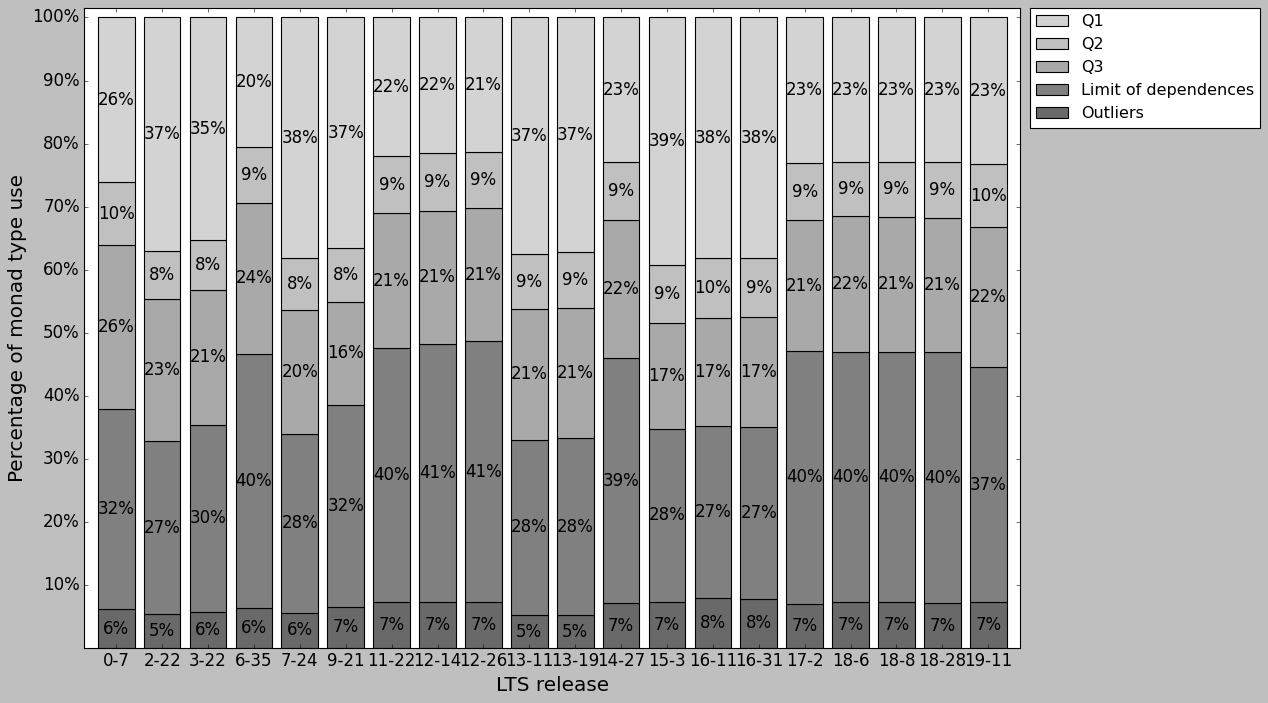

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

more_deps = ['Outliers', 'Limit of dependences','Q3','Q2','Q1']
colors = ['dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey', 'gainsboro']
for idx, more_deps in enumerate(more_deps):
    bar = ax.bar(x=lts_list, height=outlier_dir[idx], bottom=calculate_bottom(outlier_dir, idx), width=.8, color=colors[idx], align='center', label=more_deps)
    ax.bar_label(bar, labels=list(map(lambda per: f"{round(per)}%",outlier_dir[idx])), label_type='center', color='black',fontsize=15)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],fontsize=15)
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('Percentage of monad type use',fontsize=18)

plt.savefig("../../graphs/rq2_Info1.pdf", format='pdf', bbox_inches='tight')
plt.show()

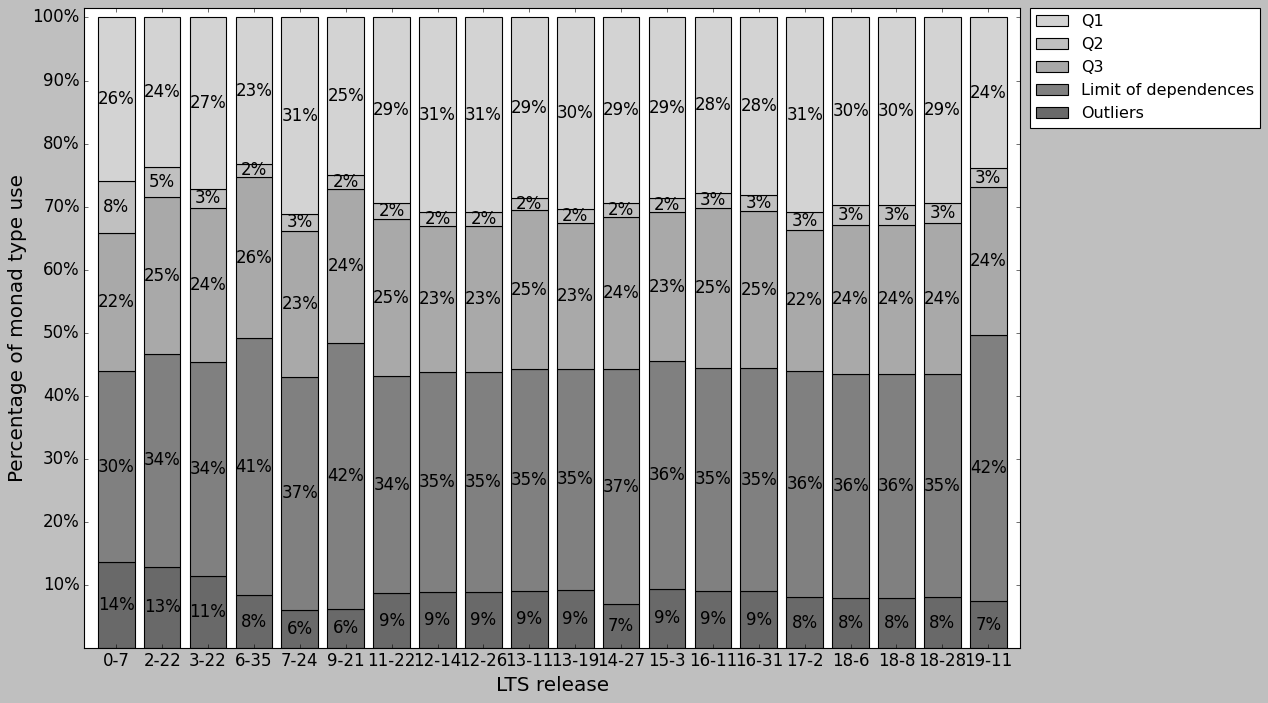

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

more_deps = ['Outliers', 'Limit of dependences','Q3','Q2','Q1']
colors = ['dimgrey', 'grey', 'darkgrey', 'silver', 'lightgrey', 'gainsboro']
for idx, more_deps in enumerate(more_deps):
    bar = ax.bar(x=lts_list, height=outlier_ind[idx], bottom=calculate_bottom(outlier_ind, idx), width=.8, color=colors[idx], align='center', label=more_deps)
    ax.bar_label(bar, labels=list(map(lambda per: f"{round(per)}%",outlier_ind[idx])), label_type='center', color='black',fontsize=15)


handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],fontsize=15)
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('Percentage of monad type use',fontsize=18)

plt.savefig("../../graphs/rq2_Info2.pdf", format='pdf', bbox_inches='tight')
plt.show()